<a href="https://colab.research.google.com/github/GabyDs/EjerciciosInteligenciaComputacional/blob/main/Experiencia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1088]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier
from xgboost import XGBClassifier

import time

In [1089]:
dataset = pd.read_csv("datos_acv.csv")

# Exploracion de los datos

In [1090]:
dataset.head()

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,9046,hombre,67.0,0,1,1,privado,urbano,228.69,36.6,fumaba,1
1,51676,mujer,61.0,0,0,1,autonomo,rural,202.21,NaN,nunca,1
2,31112,hombre,80.0,0,1,1,privado,rural,105.92,32.5,nunca,1
3,60182,mujer,49.0,0,0,1,privado,urbano,171.23,34.4,fuma,1
4,1665,mujer,79.0,1,0,1,autonomo,rural,174.12,24.0,nunca,1


In [1091]:
dataset.tail()

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
5105,18234,mujer,80.0,1,0,1,privado,urbano,83.75,NaN,nunca,0
5106,44873,mujer,81.0,0,0,1,autonomo,urbano,125.20,40.0,nunca,0
5107,19723,mujer,35.0,0,0,1,autonomo,rural,82.99,30.6,nunca,0
5108,37544,hombre,51.0,0,0,1,privado,rural,166.29,25.6,fumaba,0
5109,44679,mujer,44.0,0,0,1,gubernamental,urbano,85.28,26.2,desconocido,0


In [1092]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   genero              5110 non-null   object 
 2   edad                5110 non-null   float64
 3   hipertension        5110 non-null   int64  
 4   enfermedad_corazon  5110 non-null   int64  
 5   casado_alguna_vez   5110 non-null   int64  
 6   tipo_trabajo        5110 non-null   object 
 7   tipo_residencia     5110 non-null   object 
 8   nivel_glucosa       5110 non-null   float64
 9   imc                 4909 non-null   float64
 10  estado_fumador      5110 non-null   object 
 11  apoplejia           5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


Vemos que hay atributos que no tienen un tipo de datos definido, luego veremos que hacer con ellos

In [1093]:
dataset.describe()

,id,edad,hipertension,enfermedad_corazon,casado_alguna_vez,nivel_glucosa,imc,apoplejia
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Podemos observar que la columna 'imc' tiene valores nulos, a simple vista no podemos saber como se comporta, pero ya tenemos una idea general

In [1094]:
dataset.isna().sum()

id                      0
genero                  0
edad                    0
hipertension            0
enfermedad_corazon      0
casado_alguna_vez       0
tipo_trabajo            0
tipo_residencia         0
nivel_glucosa           0
imc                   201
estado_fumador          0
apoplejia               0
dtype: int64

In [1095]:
# Checamos los valores nulos de imc
dataset[dataset['imc'].isna()]

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
1,51676,mujer,61.0,0,0,1,autonomo,rural,202.21,NaN,nunca,1
8,27419,mujer,59.0,0,0,1,privado,rural,76.15,NaN,desconocido,1
13,8213,hombre,78.0,0,1,1,privado,urbano,219.84,NaN,desconocido,1
19,25226,hombre,57.0,0,1,0,gubernamental,urbano,217.08,NaN,desconocido,1
27,61843,hombre,58.0,0,0,1,privado,rural,189.84,NaN,desconocido,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,hombre,41.0,0,0,0,privado,rural,70.15,NaN,fumaba,0
5048,28788,hombre,40.0,0,0,1,privado,urbano,191.15,NaN,fuma,0
5093,32235,mujer,45.0,1,0,1,gubernamental,rural,95.02,NaN,fuma,0
5099,7293,hombre,40.0,0,0,1,privado,rural,83.94,NaN,fuma,0


Ademas de los valores nulos, se observa que el la columa 'estado_fumador' hay valores denominados 'desconocido' lo cual no es representativo

In [1096]:
# Checamos estos valores 'desconocido'
dataset[dataset['estado_fumador'] == 'desconocido']

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
8,27419,mujer,59.0,0,0,1,privado,rural,76.15,NaN,desconocido,1
9,60491,mujer,78.0,0,0,1,privado,urbano,58.57,24.2,desconocido,1
13,8213,hombre,78.0,0,1,1,privado,urbano,219.84,NaN,desconocido,1
19,25226,hombre,57.0,0,1,0,gubernamental,urbano,217.08,NaN,desconocido,1
23,64778,hombre,82.0,0,1,1,privado,rural,208.30,32.5,desconocido,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,hombre,9.0,0,0,0,con_niños,urbano,71.88,17.5,desconocido,0
5101,36901,mujer,45.0,0,0,1,privado,urbano,97.95,24.5,desconocido,0
5103,22127,mujer,18.0,0,0,0,privado,urbano,82.85,46.9,desconocido,0
5104,14180,mujer,13.0,0,0,0,con_niños,rural,103.08,18.6,desconocido,0


Como el valor 'desconocido' no nos dice nada, podemos remplazarlos por NaN

In [1097]:
#msno.bar(dataset, figsize=(8,5))

In [1098]:
#msno.dendrogram(dataset, figsize=(8,5))

# Informacion de variables categoricas

In [1099]:
# Vemos las categorias en cada columna

for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64' and col != 'id'):
        print(col,"->", dataset[col].unique())

genero -> ['hombre' 'mujer' 'otro']
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> ['privado' 'autonomo' 'gubernamental' 'con_niños' 'nunca_trabajo']
tipo_residencia -> ['urbano' 'rural']
estado_fumador -> ['fumaba' 'nunca' 'fuma' 'desconocido']
apoplejia -> [1 0]


In [1100]:
# Ejemplo de gráfica para una idea de las distribuciones
#dataset['casado_alguna_vez'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.2, 0.2])

In [1101]:
#dataset['tipo_trabajo'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.2, 0.3])

In [1102]:
# El riesgo de sufrir un ACV aumenta con la edad, entonces podemos asumir que
# una persona que nunca trabajo es porque es muy joven todavia

# Calculamos la cantidad de personas que tuvieron ACV sin trabajar

nunca_trabajo = dataset[dataset.tipo_trabajo == 'nunca_trabajo']
cantidad_aploplejia = nunca_trabajo['apoplejia'][nunca_trabajo.apoplejia == 1].count()
cantidad_aploplejia

0

In [1103]:
#dataset['genero'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0.1, 0.1])

El genero 'otro' es irrelevante en comparacion al resto, podemos eliminarlo sin que haya un cambio notorio

In [1104]:
cantidad_otro = dataset['genero'][dataset.genero == 'otro'].count()
print("Cantidad de personas con genero 'otro' : {}".format(cantidad_otro))

Cantidad de personas con genero 'otro' : 1


# Imputacion de los datos

In [1105]:
# Quitamos la columna id, no aporta datos relevantes
dataset.drop('id', axis=1, inplace=True)

In [1106]:
# Nos quedamos con hombre y mujer solamente
dataset = dataset[dataset.genero != 'otro']

In [1107]:
# sacamos las filas de nunca_trabajo
dataset = dataset[dataset.tipo_trabajo != 'nunca_trabajo']

In [1108]:
dataset = dataset[dataset.estado_fumador != 'desconocido']

In [1109]:
#dataset['apoplejia'][dataset.estado_fumador == 'desconocido']

In [1110]:
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64' and col != 'id'):
        print(col,"->", dataset[col].unique())

genero -> ['hombre' 'mujer']
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> ['privado' 'autonomo' 'gubernamental' 'con_niños']
tipo_residencia -> ['urbano' 'rural']
estado_fumador -> ['fumaba' 'nunca' 'fuma']
apoplejia -> [1 0]


# Transformacion de los datos

In [1111]:
# sklearn lo utilizamos después para clasificación, regresión, redes neuronales. Pero no viene mal pispear algunas de sus cualidades ya.

le = LabelEncoder()     

for col in dataset.columns:
  if dataset[col].dtype == 'object':
    # Si son columnas 'object', se codifican como numéricas. En esencia, siguen siendo categóricas.
    dataset[col] = le.fit_transform(dataset[col])   # Con le.inverse_transform() recuperamos luego la etiqueta original

In [1112]:
for col in dataset.columns:
  if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64'):
    print(col,"->", dataset[col].unique())

# Ahora tenemos números en lugar de palabras, estamos más cerca de poder operar matemáticamente la información contenida en el dataset

genero -> [0 1]
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> [3 0 2 1]
tipo_residencia -> [1 0]
estado_fumador -> [1 2 0]
apoplejia -> [1 0]


In [1113]:
dataset['imc'].fillna(dataset['imc'].median(), inplace=True)

# Correlacion entre variables

In [1114]:
"""
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()
"""

'\nsns.heatmap(data=dataset.corr(), annot=True)\n\nfig=plt.gcf()\nfig.set_size_inches(20,12)\nplt.show()\n'

# Identificamos Outliers

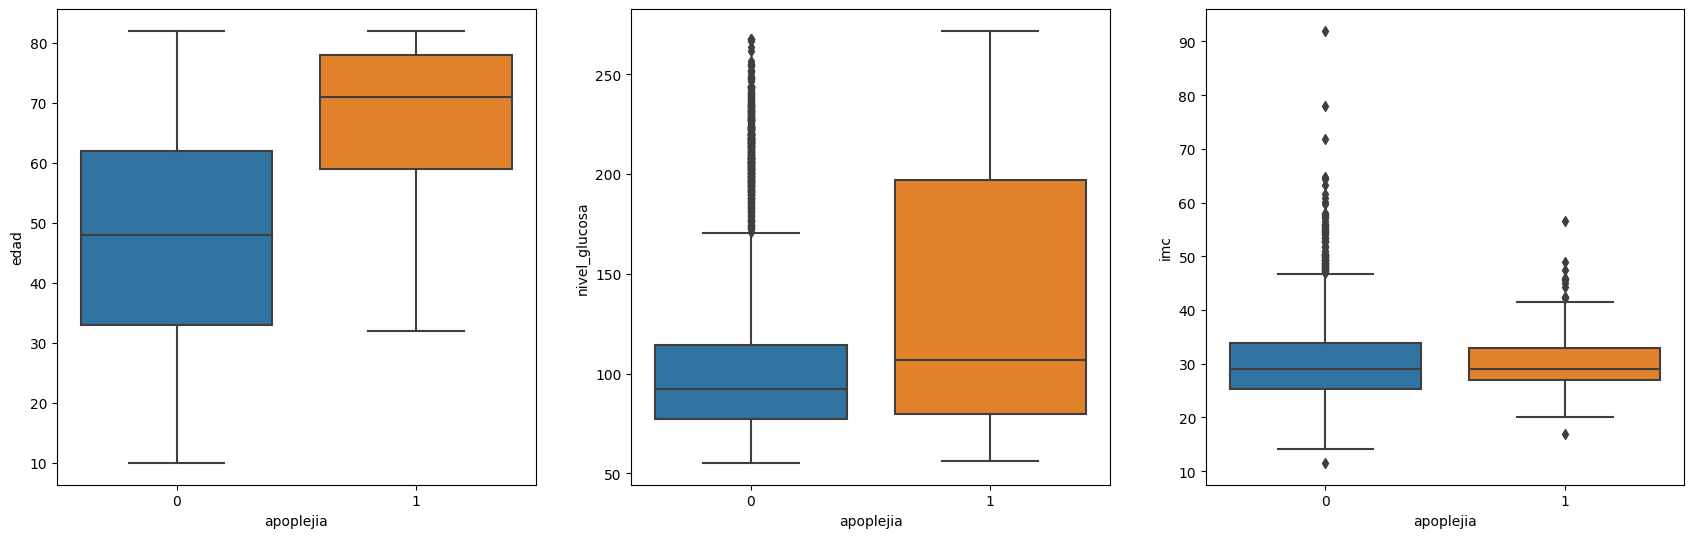

In [1115]:
dataset_numericas = dataset.select_dtypes('float64')

plt.rcParams['figure.figsize'] = (21,21)
for i, col in enumerate(dataset_numericas.columns, 1):
    plt.subplot(3,3,i) 
    ax = sns.boxplot(y = col , x = "apoplejia", data = dataset)

Vemos que para imc a partir de 80 se nota mucho que estan fuera de rango los valores, tambien en edad, de aproximadamente 10 para abajo lo mismo

In [1116]:
dataset[dataset.imc >= 70]

,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
544,0,42.0,0,0,1,3,0,210.48,71.9,2,0
928,1,23.0,1,0,0,3,1,70.03,78.0,0,0
4209,0,38.0,1,0,1,3,0,56.90,92.0,2,0


In [1117]:
# Eliminamos outliers
dataset = dataset[dataset.imc <= 70]

# Entrenamiento y clasificacion

In [1118]:
# Definimos la columna de salida, ya que hacemos un aprendizaje supervisado

y = dataset['apoplejia']
X = dataset.drop('apoplejia', axis=1)

In [1119]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de datos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [1120]:
# Dividimos el dataset en dos, entrenamiento y test

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=1)

# shuffle mezcla los datos, anteriormente ya lo habiamos hecho, pero no esta de mas

In [1121]:
# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

In [1122]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))
    
    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

# Regresion logistica

In [1123]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1005
           1       0.81      0.83      0.82      1003

    accuracy                           0.82      2008
   macro avg       0.82      0.82      0.82      2008
weighted avg       0.82      0.82      0.82      2008

#######################################
Accuracy: 81.52%
Recall: 81.52%
Precision: 81.55%
F1-Score: 81.52%
MCC: 63.08%
Tiempo de entrenamiento: 0.0621 s
Tiempo de predicción: 0.0019 s
Tiempo total: 0.0641 s
#######################################


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


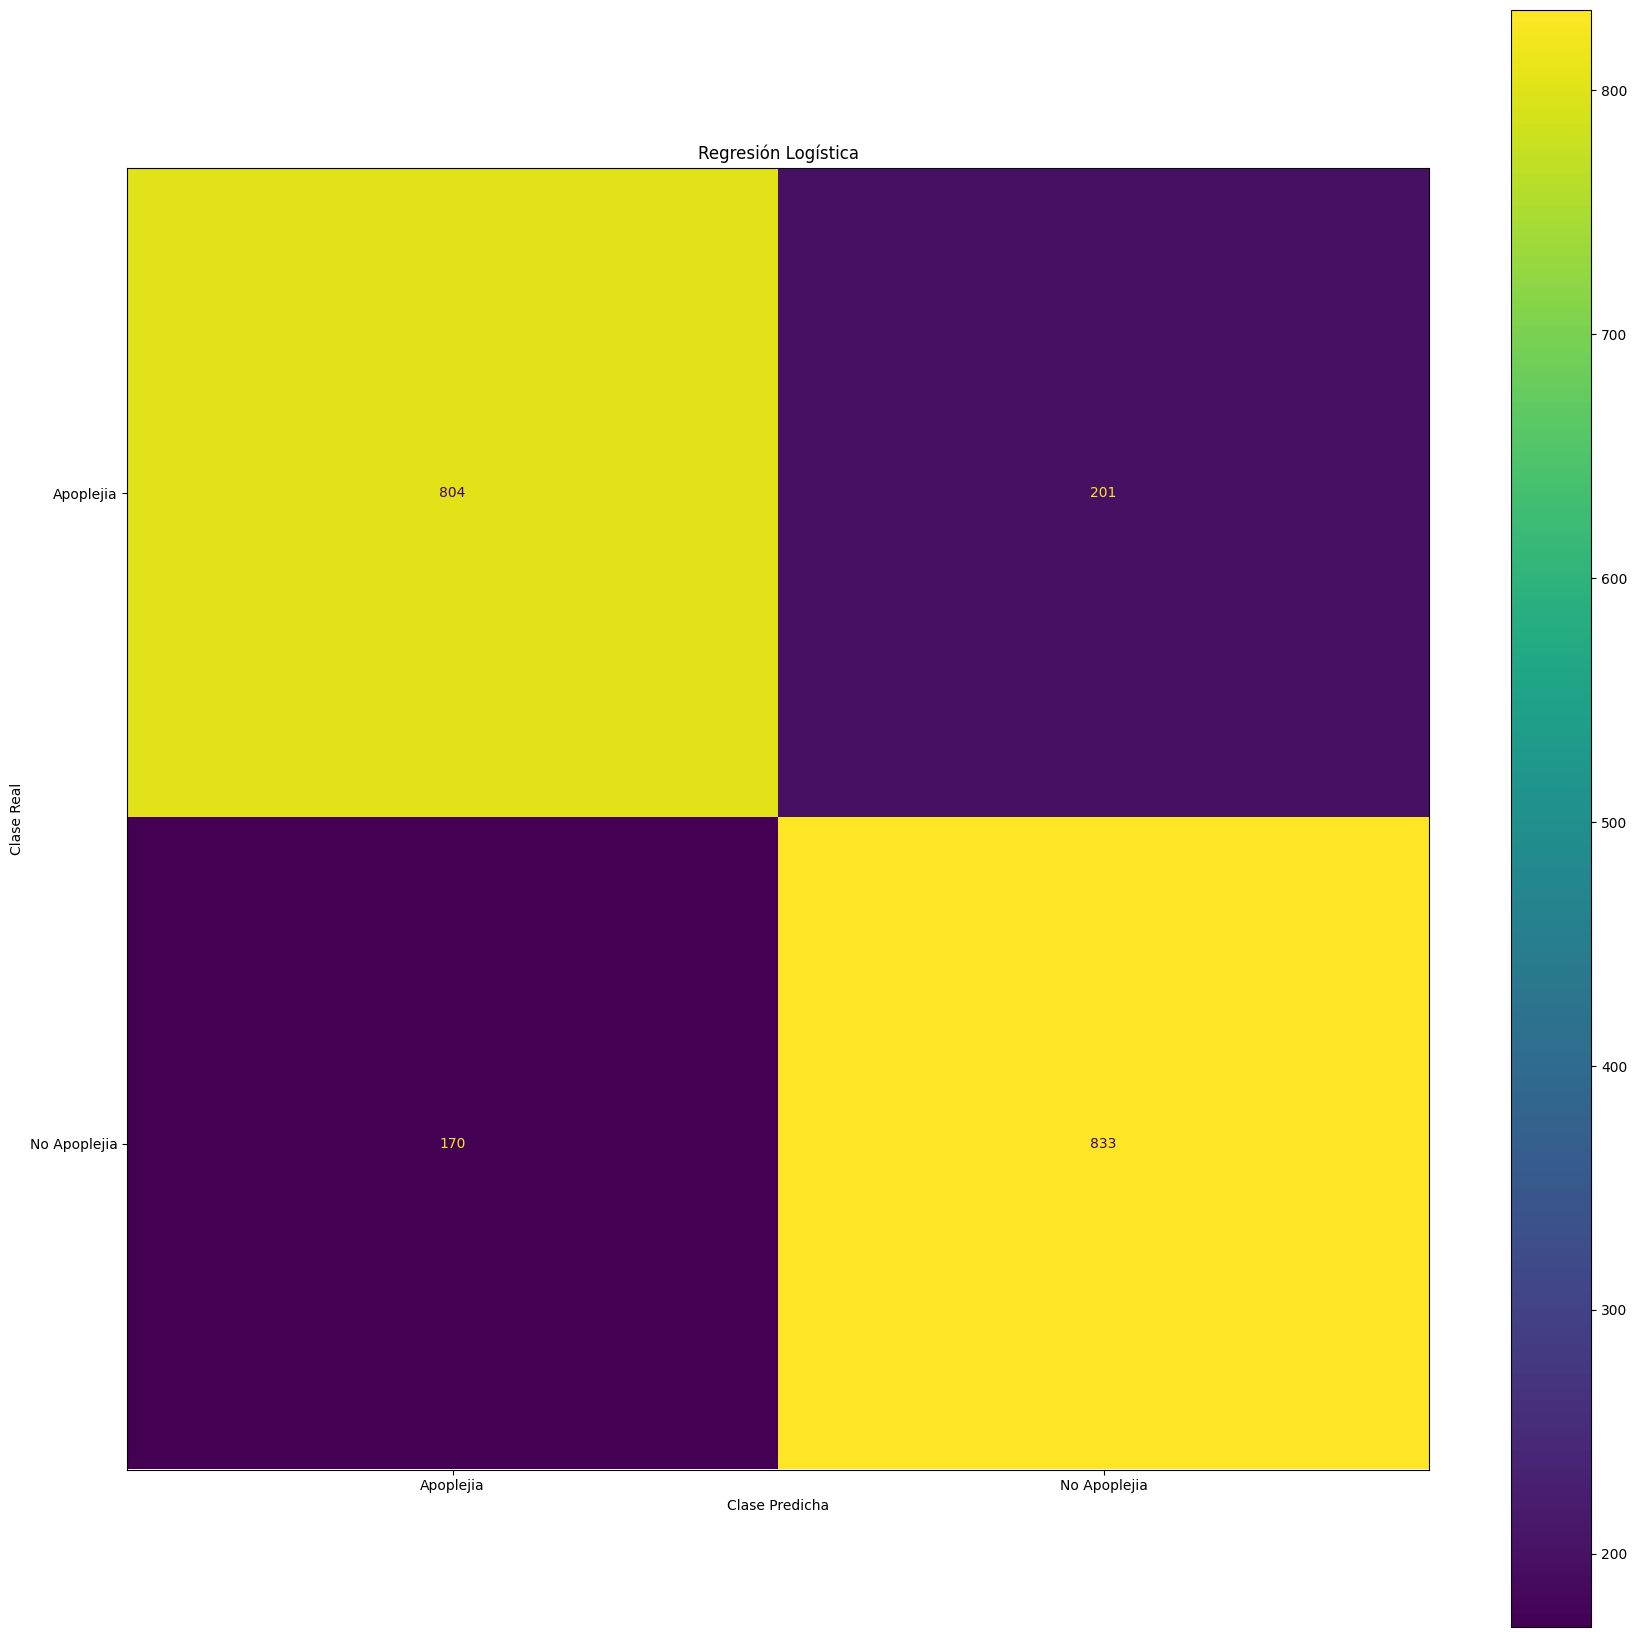

In [1131]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=["Apoplejia", "No Apoplejia"], model_name="Regresión Logística")

# Arbol de desicion

In [1124]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1005
           1       0.88      0.92      0.90      1003

    accuracy                           0.90      2008
   macro avg       0.90      0.90      0.90      2008
weighted avg       0.90      0.90      0.90      2008

#######################################
Accuracy: 89.94%
Recall: 89.94%
Precision: 90.03%
F1-Score: 89.93%
MCC: 79.97%
Tiempo de entrenamiento: 0.0220 s
Tiempo de predicción: 0.0021 s
Tiempo total: 0.0240 s
#######################################


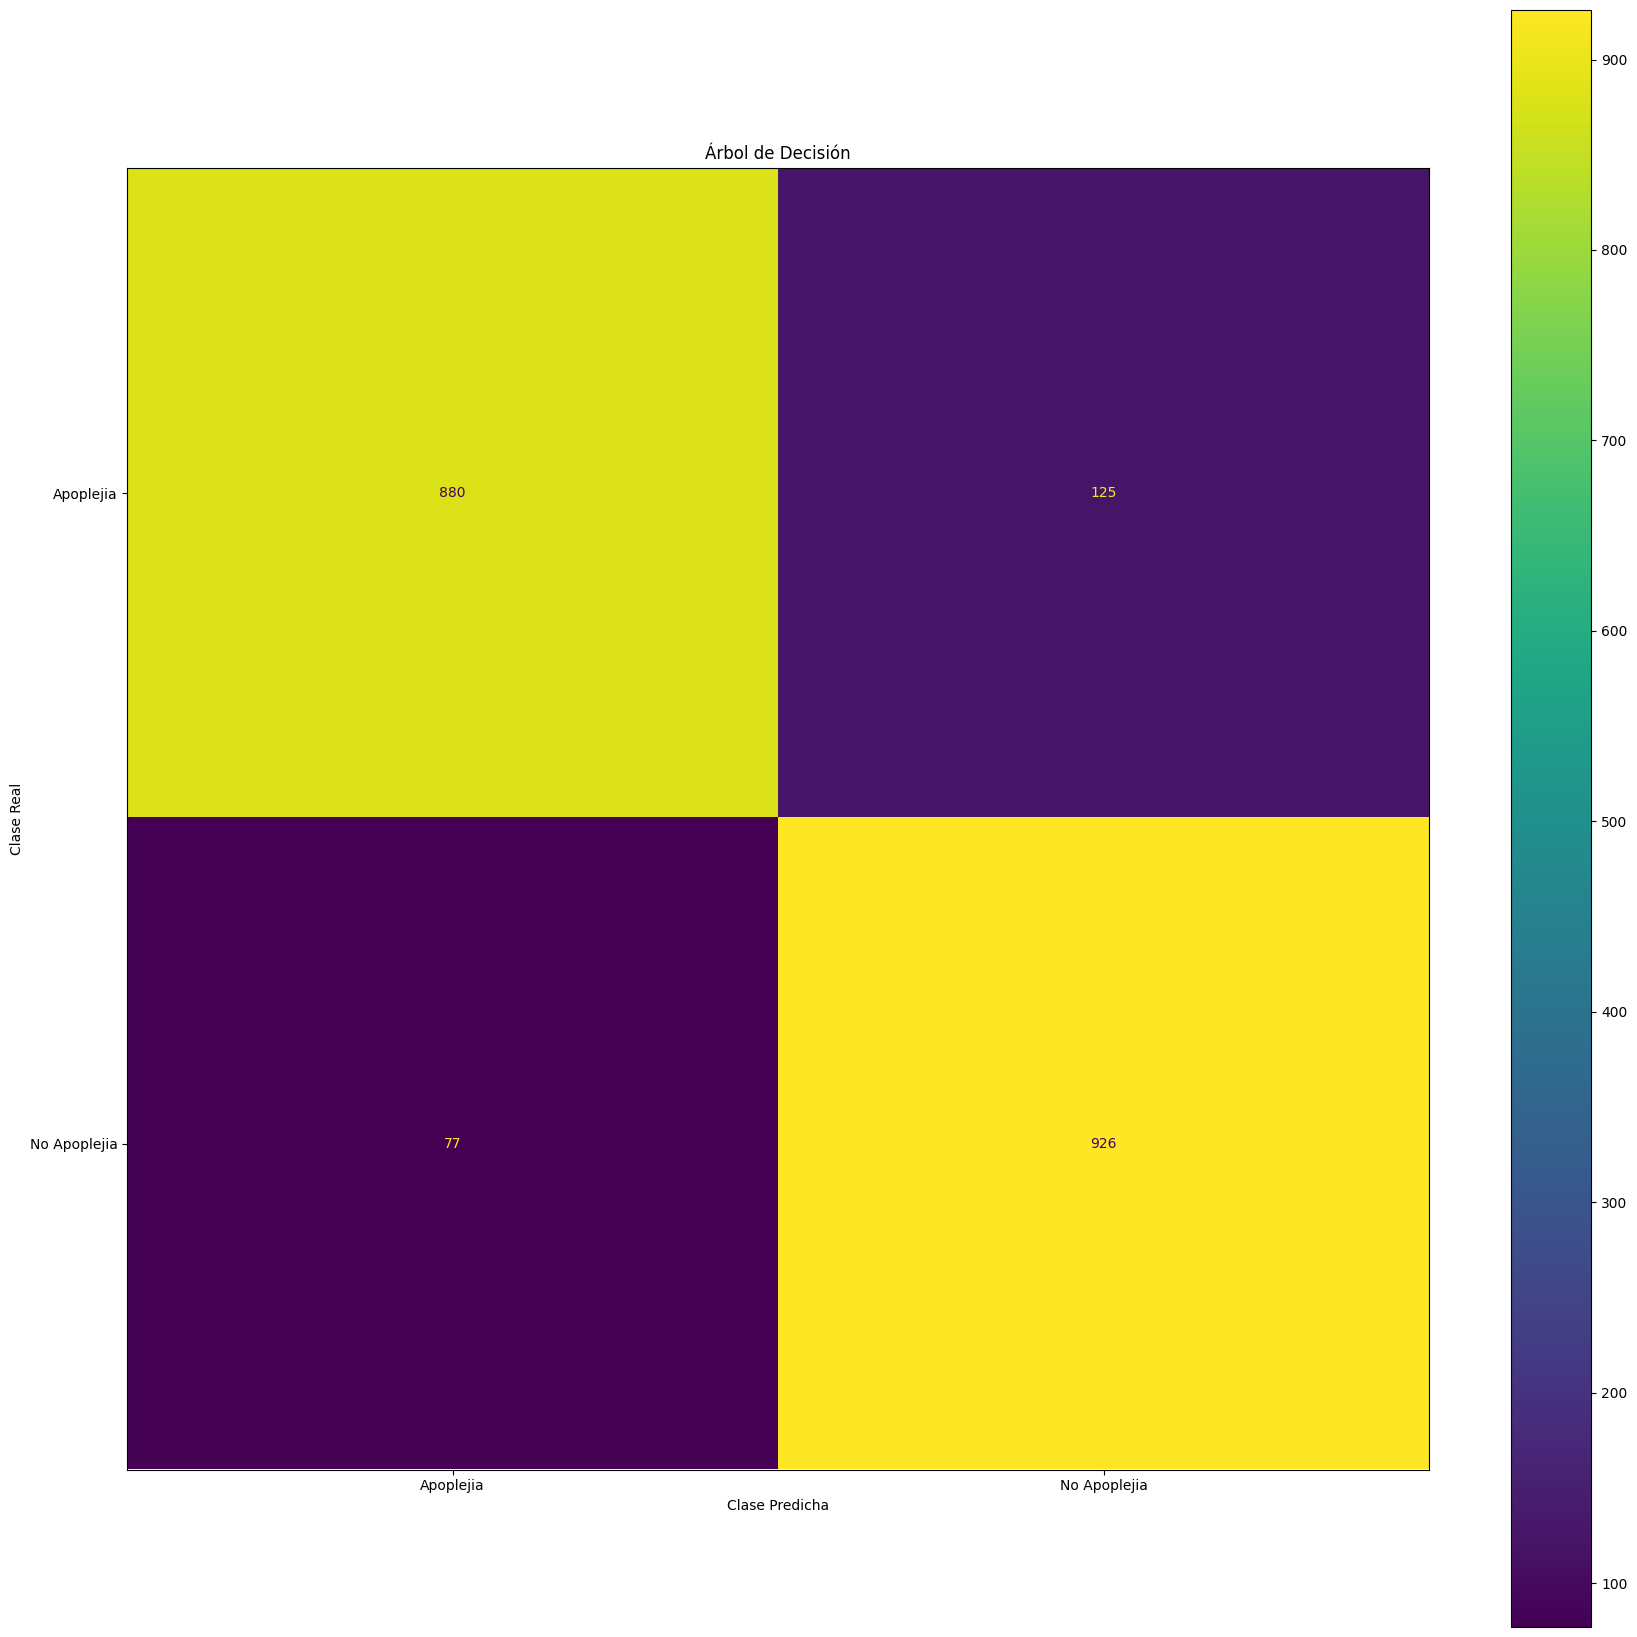

In [1133]:
plot_confusion_matrix(y_test, pred_tree, labels=["Apoplejia", "No Apoplejia"], model_name="Árbol de Decisión")

# Random Forest

In [1134]:
start = time.time() # Estampa de tiempo para computar métricas

# Definir los pesos de clase
weights = {0: 1.0, 1: 1.0}

# Entrenamos el modelo
# Creamos el modelo de RandomForestClassifier con 100 árboles
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=weights)
rfc.fit(X_train, y_train)

end_train = time.time()

# Predecimos sobre los datos de prueba
y_pred = rfc.predict(X_test)
end_predict = time.time()


print("Classification Report: \n", classification_report(y_test, y_pred))
muestra_metricas("RandomForest", y_test, y_pred, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1005
           1       0.91      0.96      0.93      1003

    accuracy                           0.93      2008
   macro avg       0.93      0.93      0.93      2008
weighted avg       0.93      0.93      0.93      2008

#######################################
Accuracy: 93.18%
Recall: 93.18%
Precision: 93.33%
F1-Score: 93.17%
MCC: 86.50%
Tiempo de entrenamiento: 0.5009 s
Tiempo de predicción: 0.0350 s
Tiempo total: 0.5358 s
#######################################


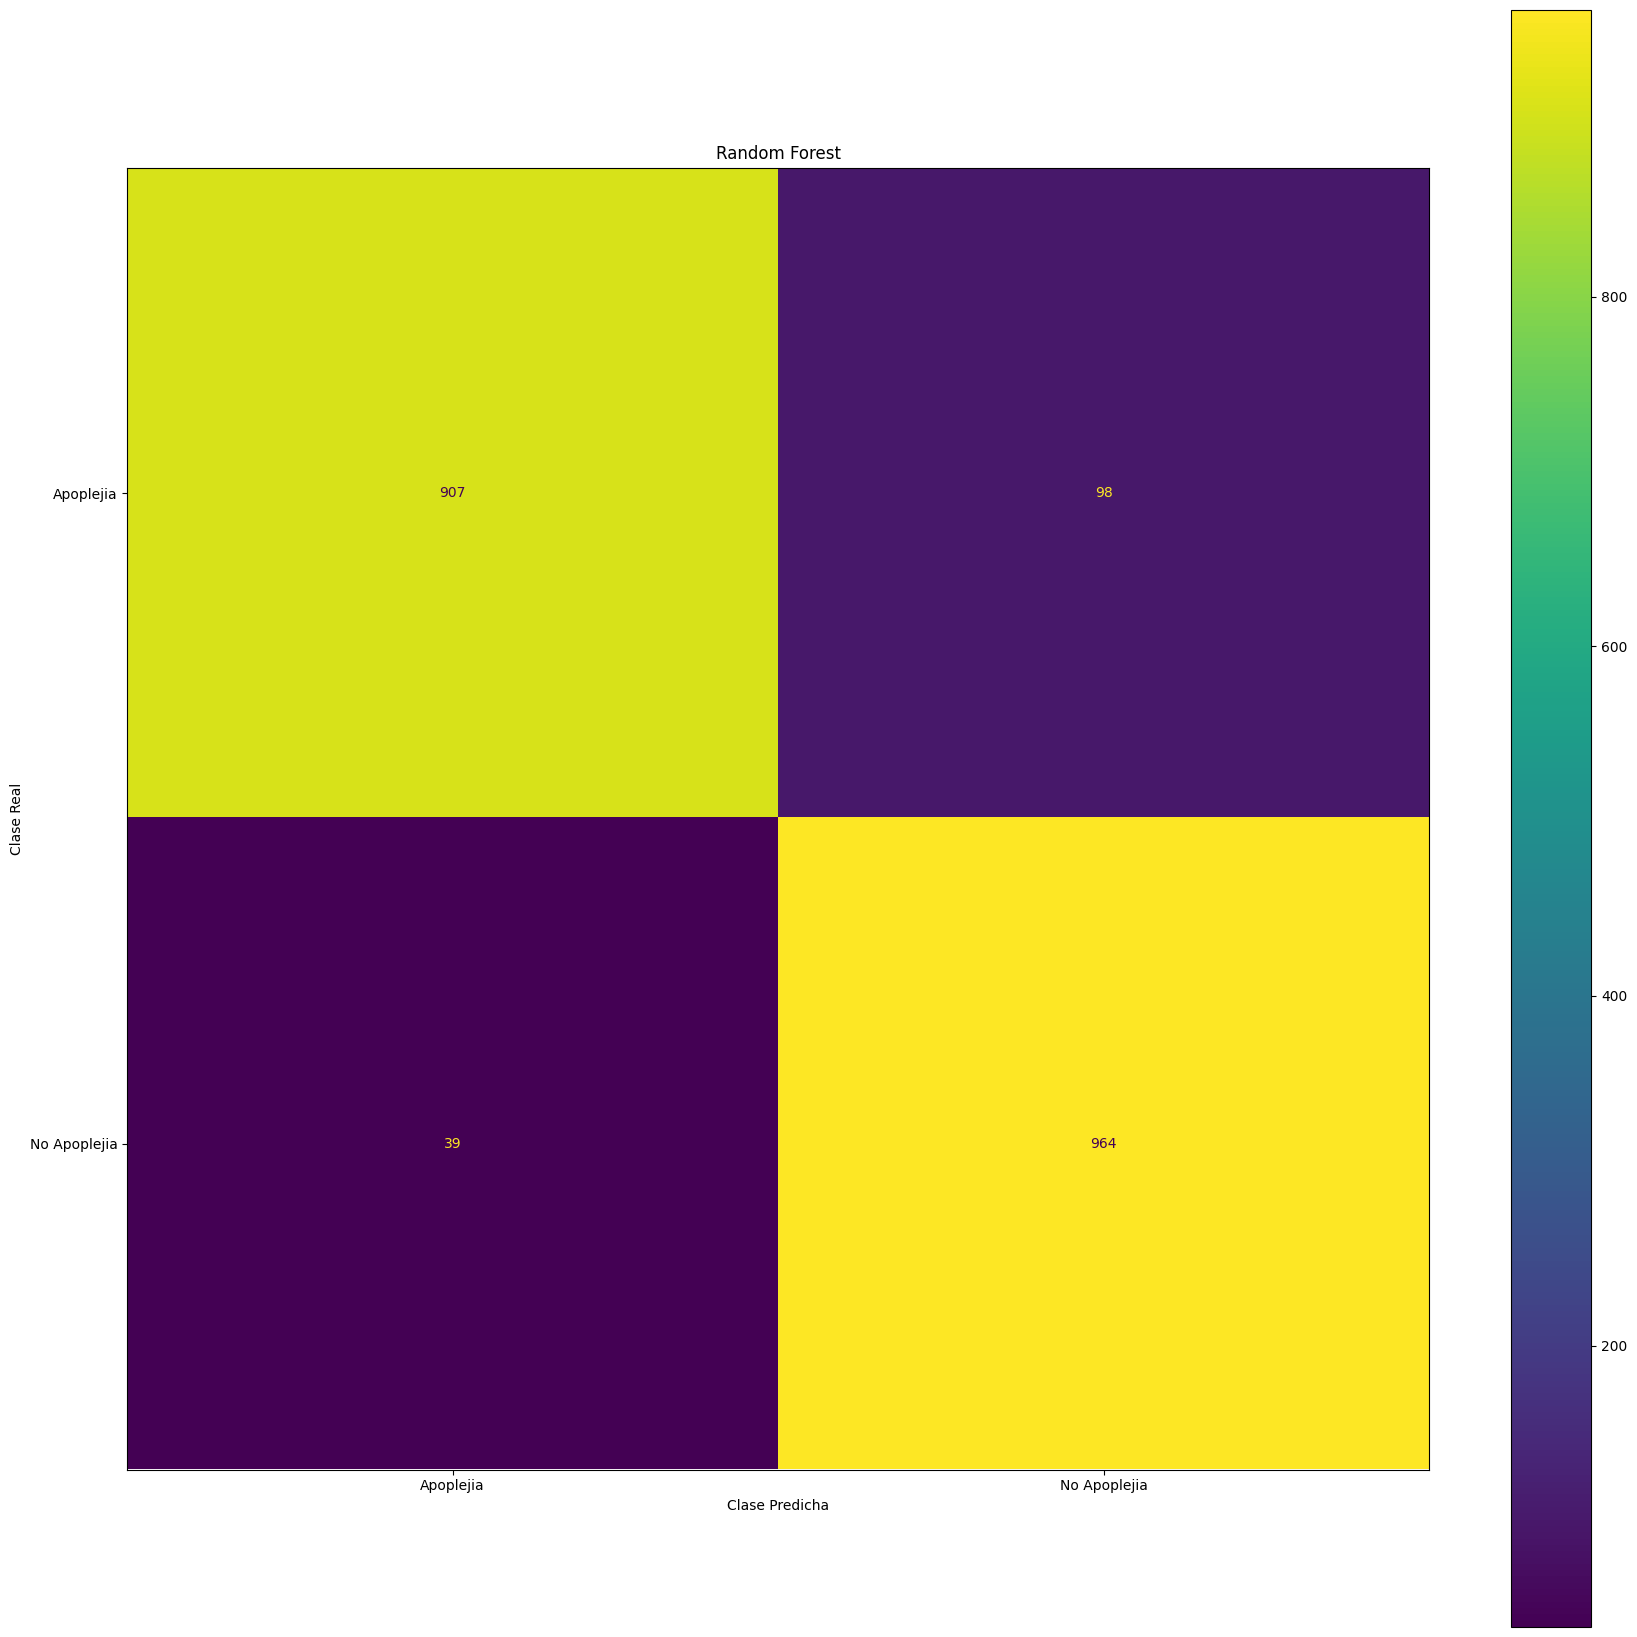

In [1135]:
plot_confusion_matrix(y_test, y_pred, labels=["Apoplejia", "No Apoplejia"], model_name="Random Forest")

# K vecinos cercanos

In [1136]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      1005
           1       0.81      0.98      0.89      1003

    accuracy                           0.88      2008
   macro avg       0.89      0.88      0.87      2008
weighted avg       0.89      0.88      0.87      2008

#######################################
Accuracy: 87.50%
Recall: 87.50%
Precision: 89.10%
F1-Score: 87.37%
MCC: 76.59%
Tiempo de entrenamiento: 0.0122 s
Tiempo de predicción: 0.0462 s
Tiempo total: 0.0584 s
#######################################


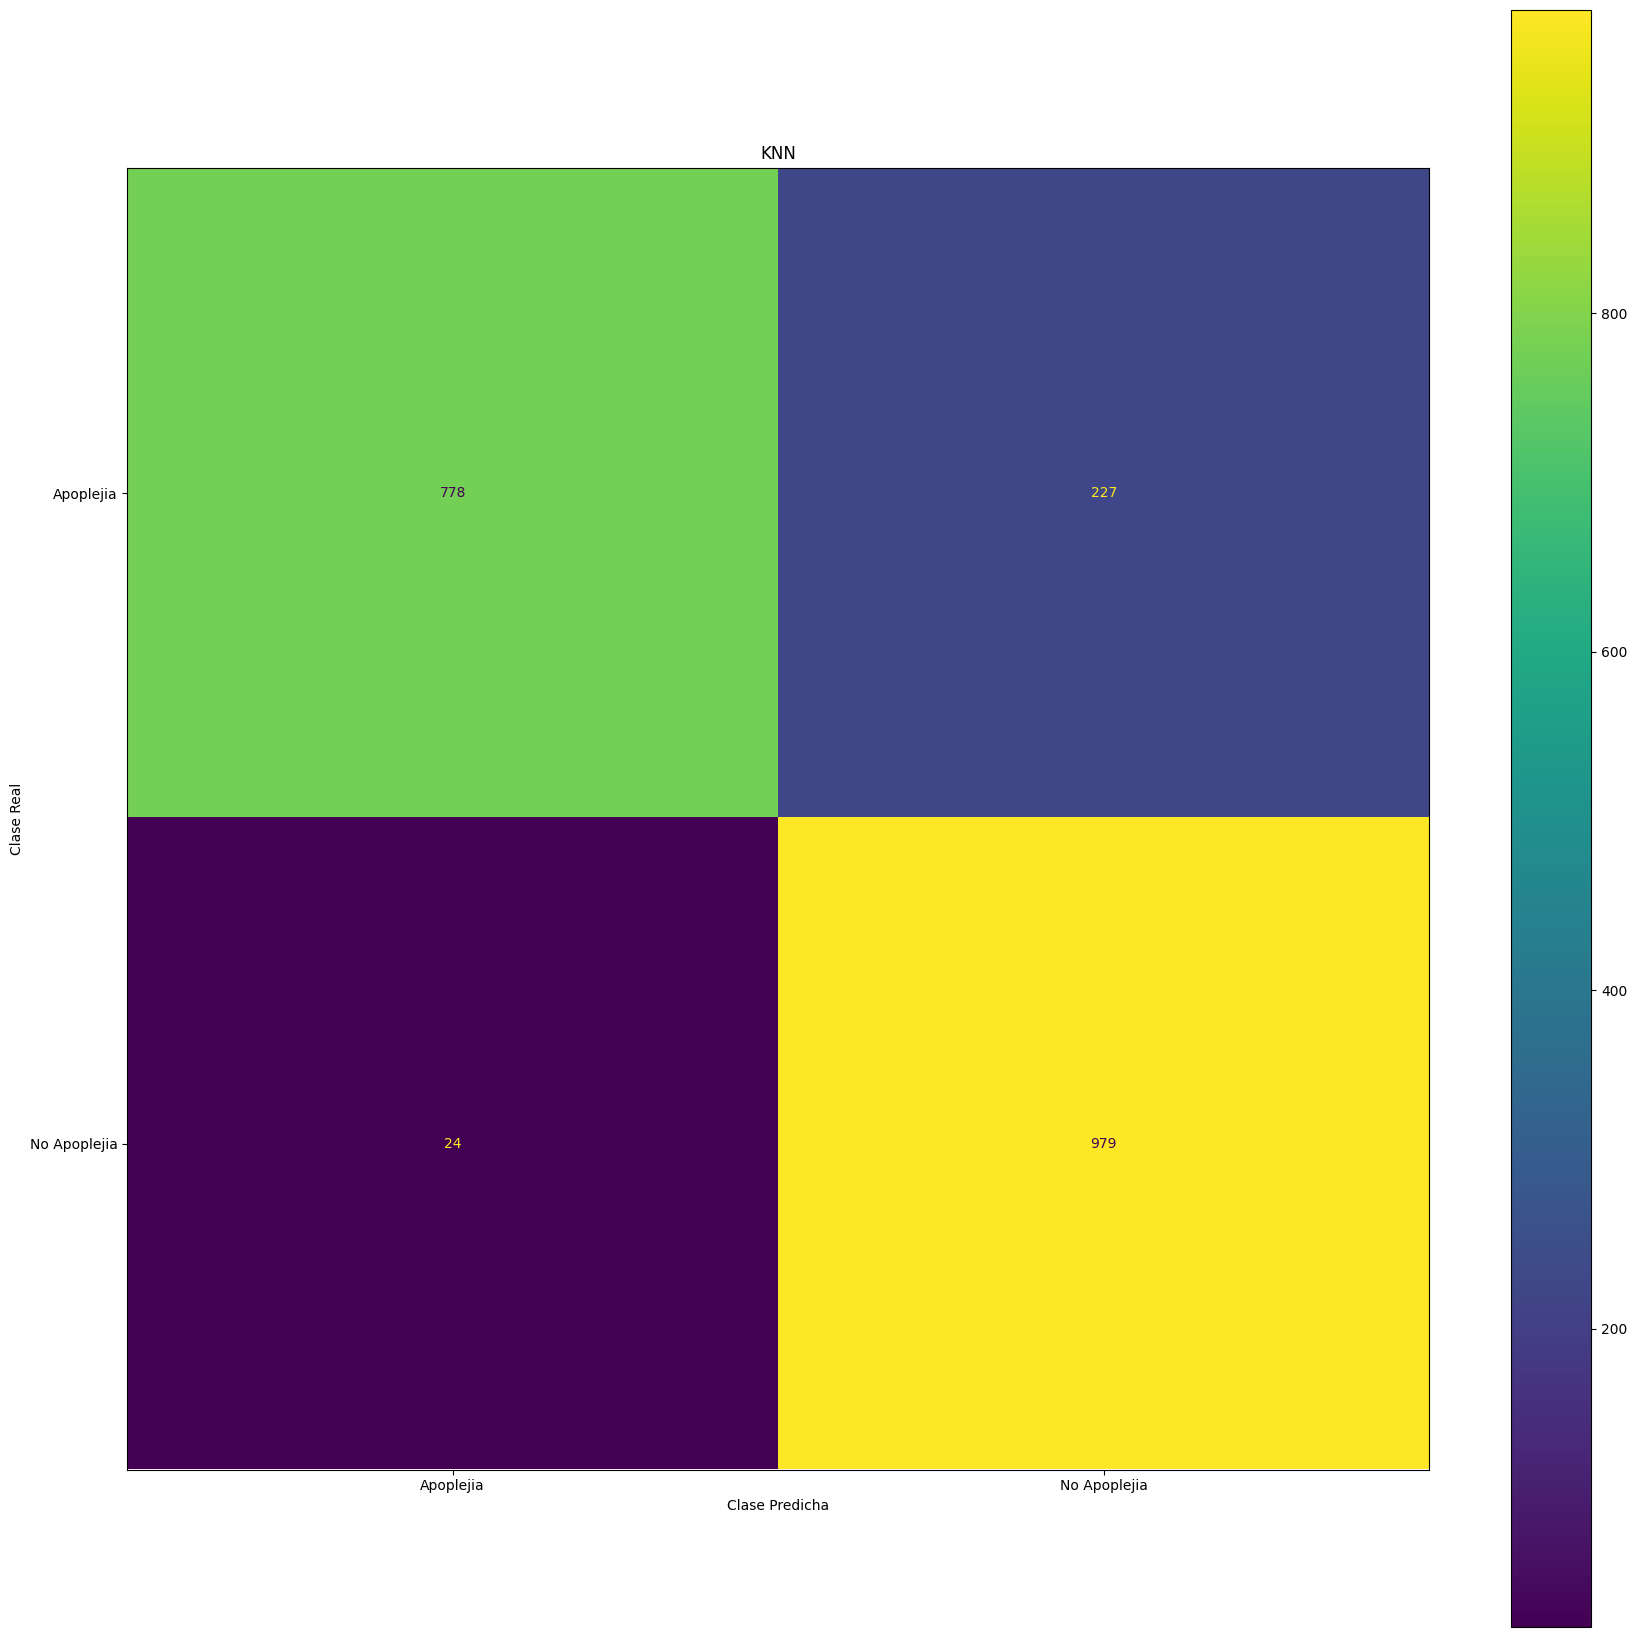

In [1137]:
plot_confusion_matrix(y_test, pred_knn, labels=["Apoplejia", "No Apoplejia"], model_name="KNN")

# XGB

In [1127]:
# Si aparece: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
# Significa que este clasificador necesita que la codificación de las clases de salida comiencen por 0
# Esta transformación la podemos realizar de manera sencilla

le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

# El la salida para test también debería de transformarse, sino se comprara cosas distintas
y_test_transformed = le.fit_transform(y_test)

In [1154]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train, y_train_transformed)
end_train = time.time()

# Predicciones
pred_xgbc = xgbc_clf.predict(X_test, ntree_limit=100)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test_transformed, pred_xgbc))
muestra_metricas("XGBClassifier", y_test_transformed, pred_xgbc, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1005
           1       0.94      0.96      0.95      1003

    accuracy                           0.95      2008
   macro avg       0.95      0.95      0.95      2008
weighted avg       0.95      0.95      0.95      2008

#######################################
Accuracy: 94.67%
Recall: 94.67%
Precision: 94.69%
F1-Score: 94.67%
MCC: 89.37%
Tiempo de entrenamiento: 0.3303 s
Tiempo de predicción: 0.0061 s
Tiempo total: 0.3364 s
#######################################


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


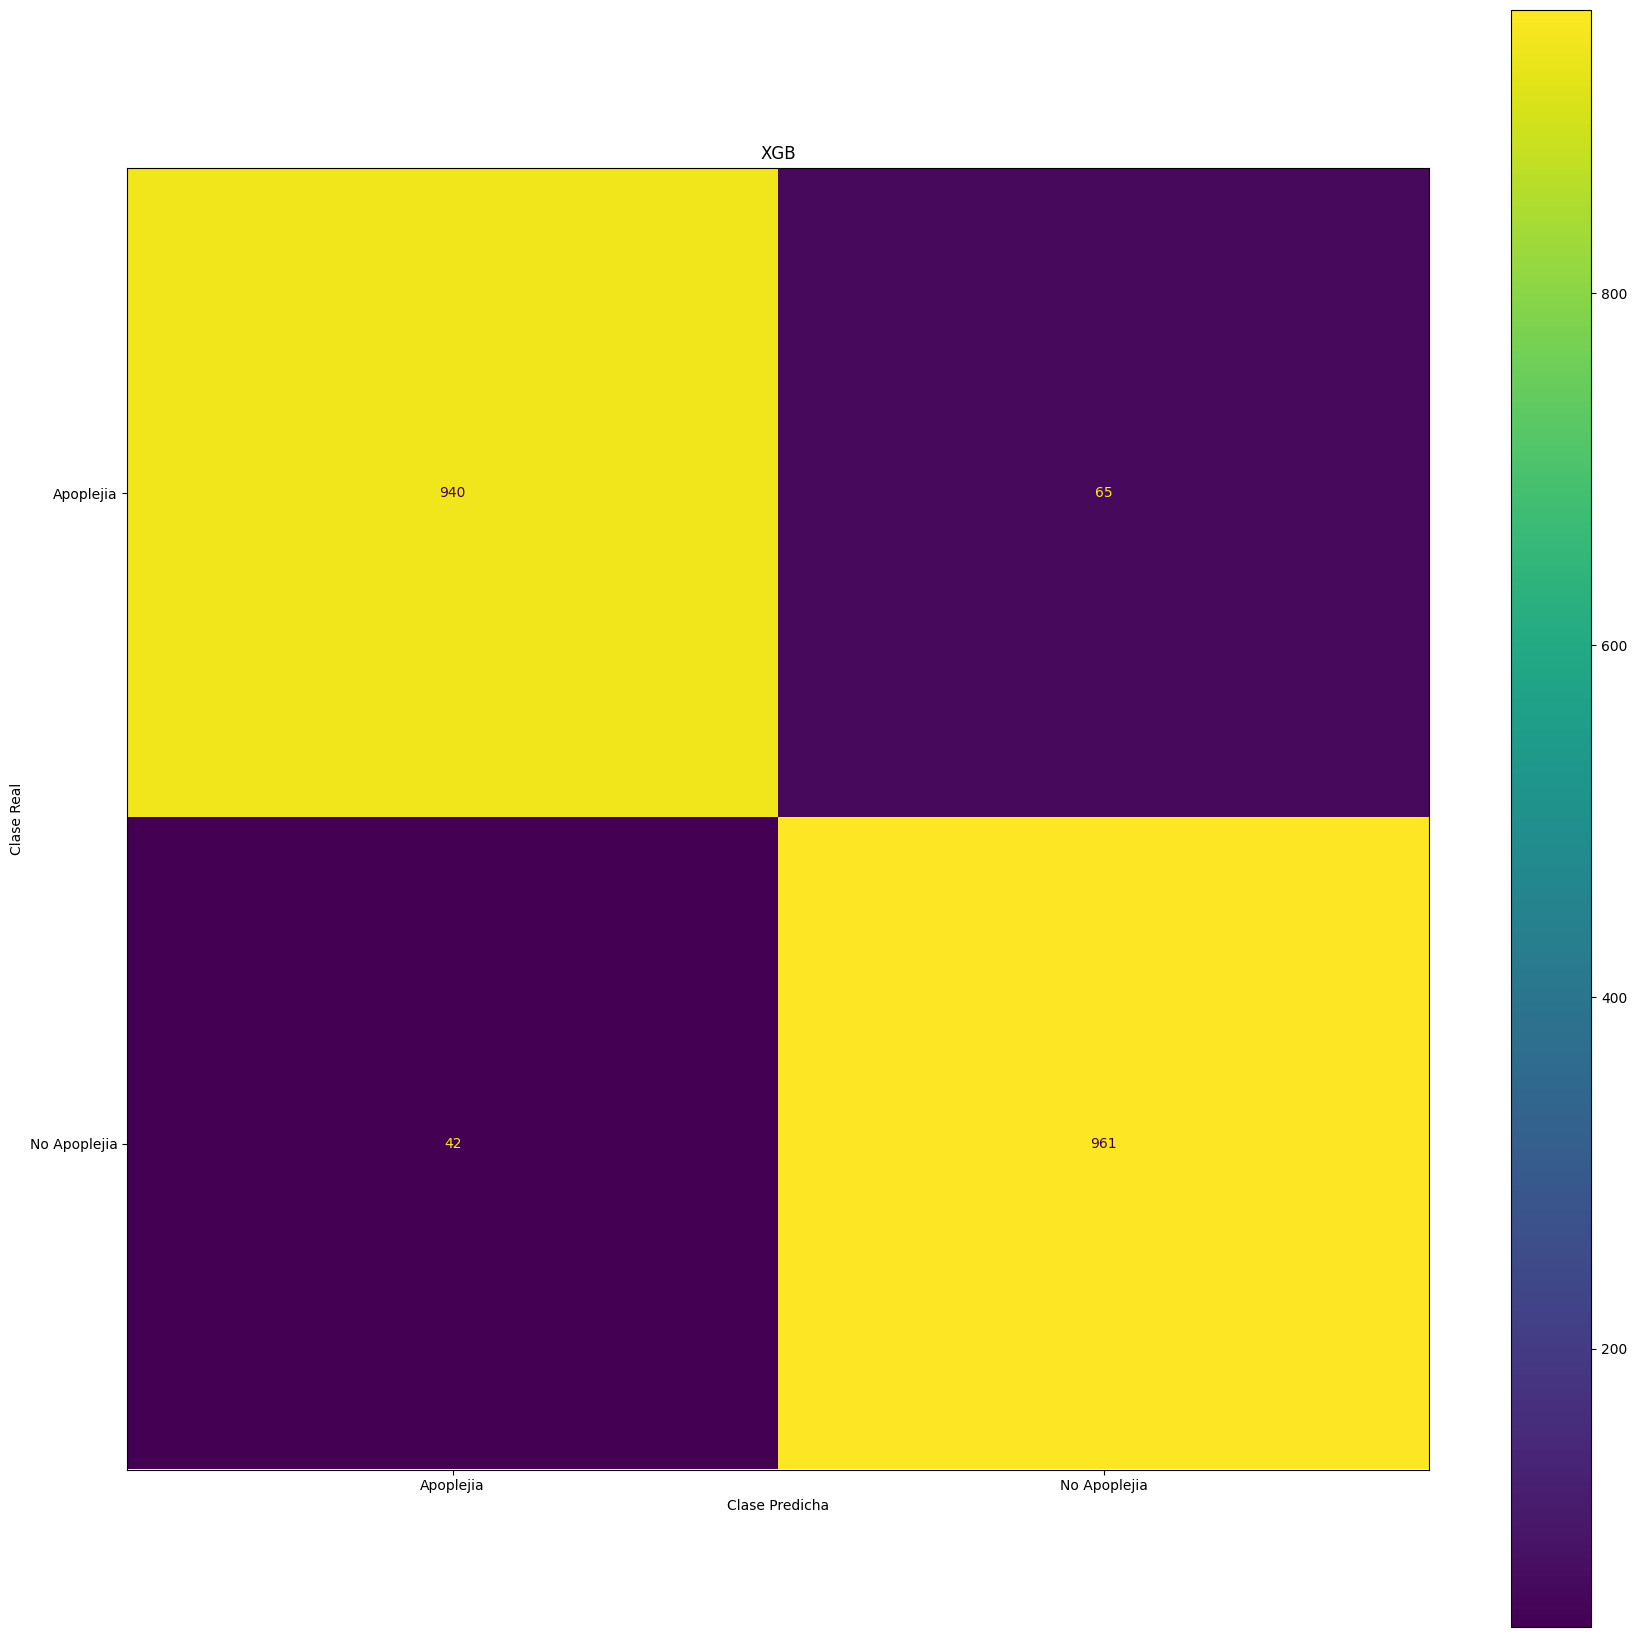

In [1139]:
plot_confusion_matrix(y_test, pred_xgbc, labels=["Apoplejia", "No Apoplejia"], model_name="XGB")

# Red Neuronal

In [1140]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((50,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.81      1005
           1       0.79      0.88      0.83      1003

    accuracy                           0.82      2008
   macro avg       0.83      0.82      0.82      2008
weighted avg       0.83      0.82      0.82      2008

#######################################
Accuracy: 82.47%
Recall: 82.47%
Precision: 82.88%
F1-Score: 82.42%
MCC: 65.35%
Tiempo de entrenamiento: 1.3640 s
Tiempo de predicción: 0.0025 s
Tiempo total: 1.3666 s
#######################################


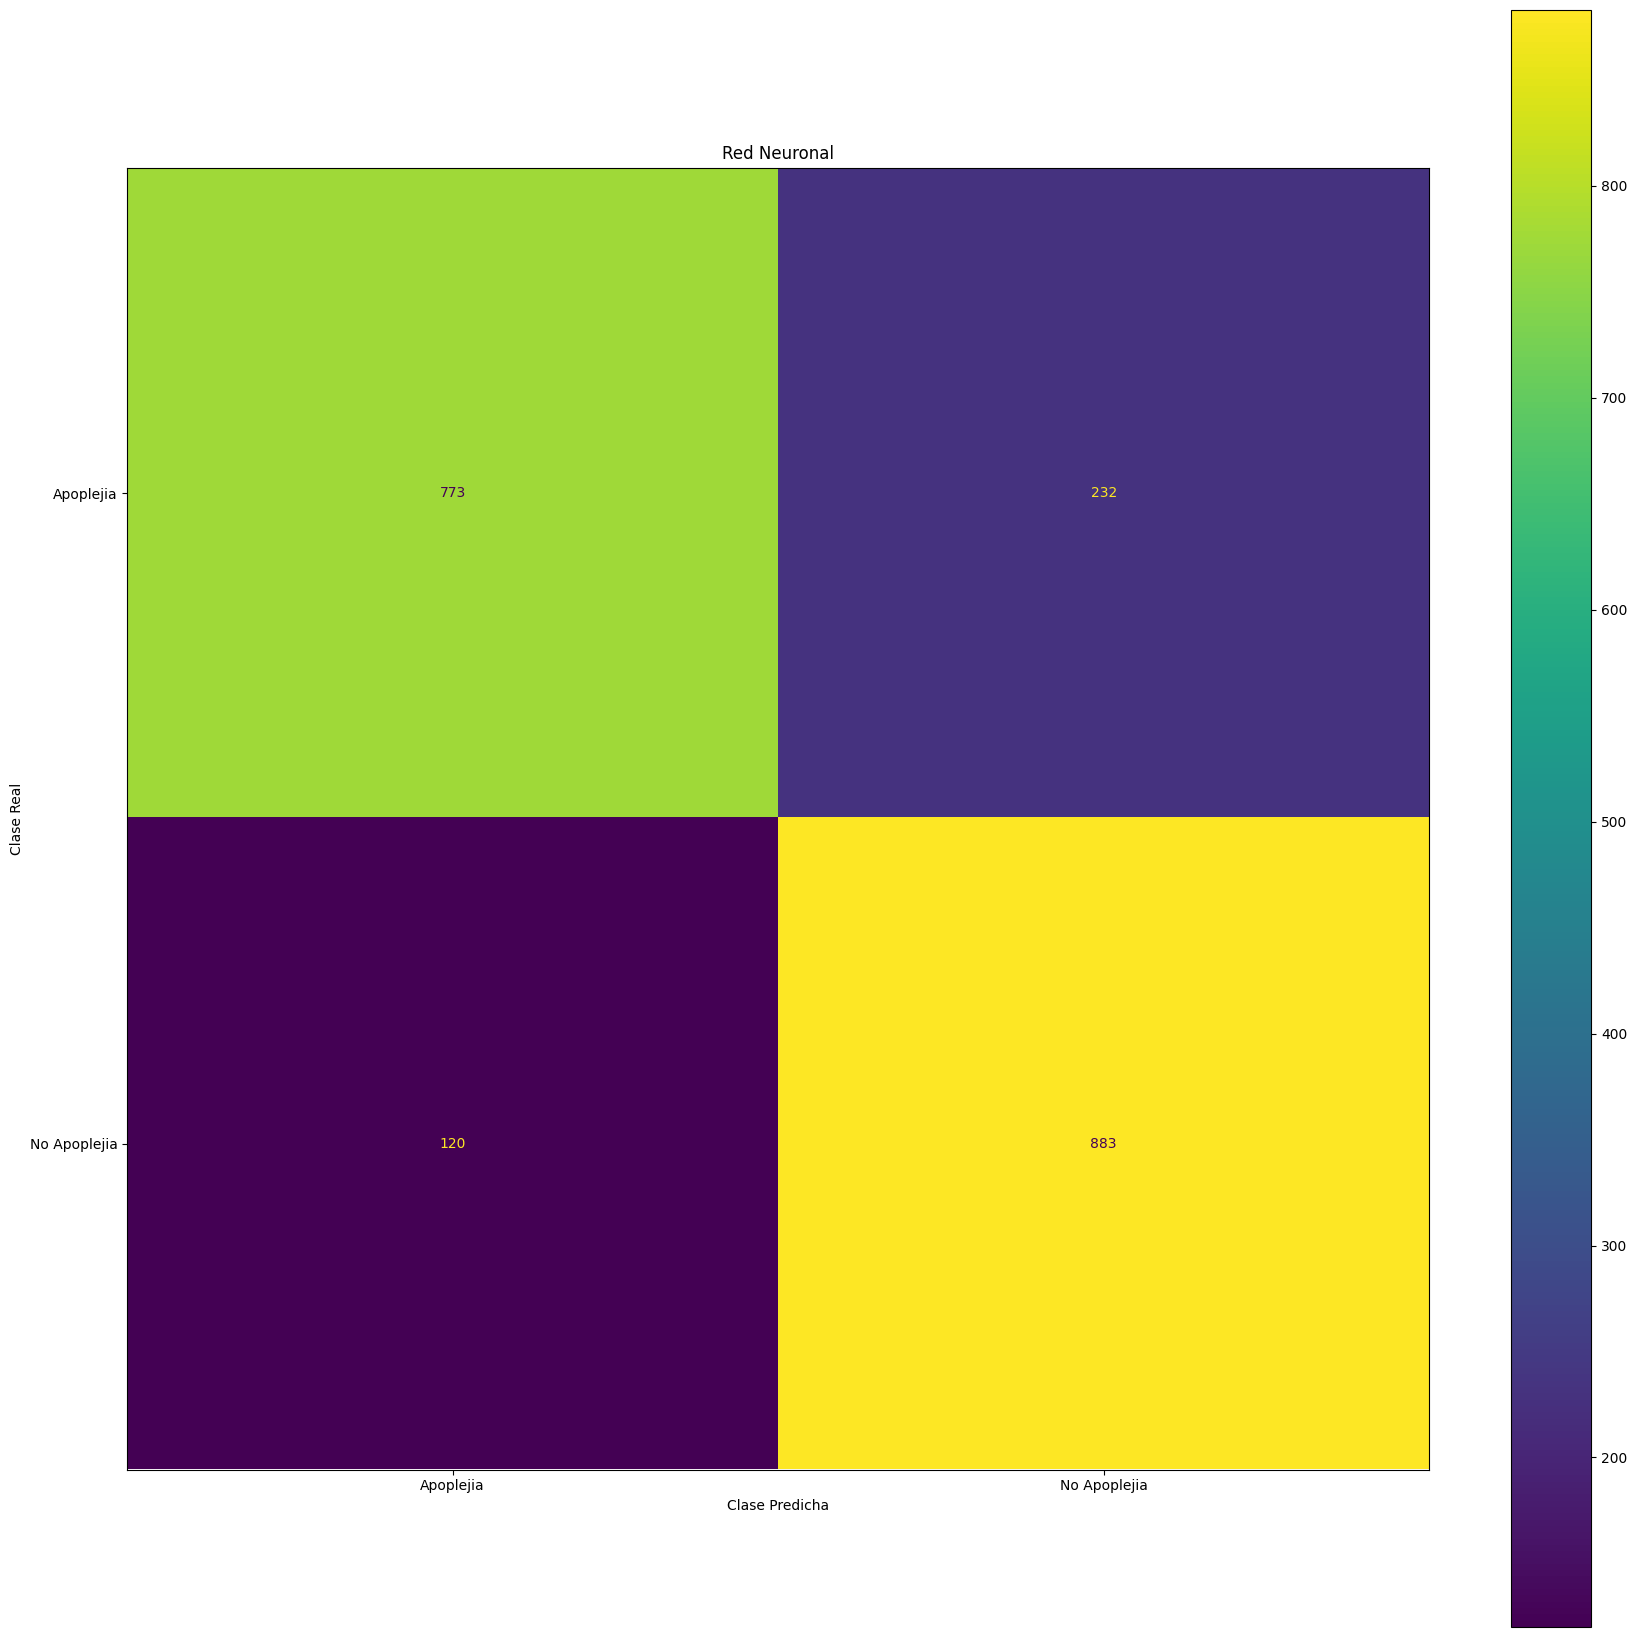

In [1141]:
plot_confusion_matrix(y_test, pred_nn, labels=["Apoplejia", "No Apoplejia"], model_name="Red Neuronal")

# Comparacion de modelos

In [1155]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,81.52%,81.52%,81.55%,81.52%,63.08%,0.062,0.002,0.064
DecisionTreeClassifier,89.94%,89.94%,90.03%,89.93%,79.97%,0.022,0.002,0.024
RandomForest,93.18%,93.18%,93.33%,93.17%,86.50%,0.501,0.035,0.536
KNeighborsClassifier,87.50%,87.50%,89.10%,87.37%,76.59%,0.012,0.046,0.058
XGBClassifier,94.67%,94.67%,94.69%,94.67%,89.37%,0.330,0.006,0.336
Multi-layer Perceptron classifier,82.47%,82.47%,82.88%,82.42%,65.35%,1.364,0.003,1.367
